# Using EM to fit Piecewise distribution

* Porato 
* Piecewise Exponential Distribution

In [184]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, f, pareto, expon, beta, gamma

%matplotlib inline
gamma_1 = 0
gamma_2 = 0.1

In [5]:
def piecewise_exponential(_lambda,x):
    return _lambda*np.exp(-_lambda*x)/(np.exp(-_lambda*gamma_1)-np.exp(-_lambda*gamma_2))

def obj_func(_lambda,X,tau):
    objective = 0
    for i in range(tau.shape[0]):
        objective += -tau*np.log(piecewise_exponential(_lambda,X[i]))
    return objective

def E_step(X,P,_lambda,tau):
    for i,x in enumerate(X):
        den = np.dot(P, piecewise_exponential(_lambda,x).T)
        tau[i,:] = P*piecewise_exponential(_lambda,x)/den
#         for j, p in enumerate(P):
#             tau[i,j] = p*piecewise_exponential(_lambda[j],x)/()

def M_step(tau,_lambda,X):
    
    P = np.mean(tau,axis=0)
    for j in range(tau.shape[1]):
        _lambda[j] =  minimize(obj_func,
                               _lambda[j],
                               args=(X,tau[:,j]),
                               # constraints=cons,
#                                bounds=bnds,
                               method='SLSQP',
                               options={'disp': True,'maxiter':500})

# Load Data and Draw Distributions
* Range-to-lead-car in cut-in
* Range-to-lead-car in hard-braking
* Velocity difference in conflict

In [5]:
import pickle as pkl
all_cut_in = pkl.load(open('all_cut_in.pkl','rb'))
all_hard_braking = pkl.load(open('all_hard_braking.pkl','rb'))
all_conflict = pkl.load(open('all_conflict.pkl','rb'))
car_length = 6

## Hard Braking

* Pareto : (0.4713717217823854, -1.9115677387228951, 2.5431574976513902)
* exponential : (0.63158975827039421, 57.014096079752321)
* $B$ distribution : (0.50480138440290034,
 2.0636112582979074,
 0.63158975894468994,
 400.466459763334)
* student-t
* f distribution : (2.4332002401965562,
 2.2348200094868131,
 0.63158884500681189,
 18.954302012529237)
* $\Gamma$ distribution: (0.63183127858020716, 0.63158975894468994, 84.256138707011019)

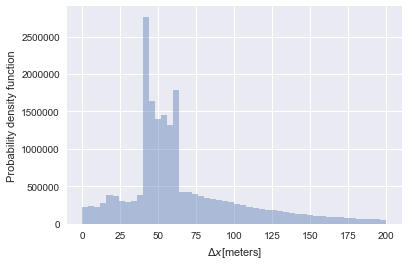

In [35]:
hard_braking_distance = all_hard_braking['distance'][np.where(all_hard_braking['distance']<200)]
sns.set()
plt.figure(1)
sns.distplot(hard_braking_distance, kde=False)
plt.xlabel(r"$\Delta x$[meters]")
plt.ylabel("Probability density function")

# hard_braking_dv = all_hard_braking['dv']
# plt.figure(2)
# sns.distplot(hard_braking_dv)
# plt.xlabel(r"$\Delta v$[meters/seconds]")
# plt.ylabel("Probability density function")

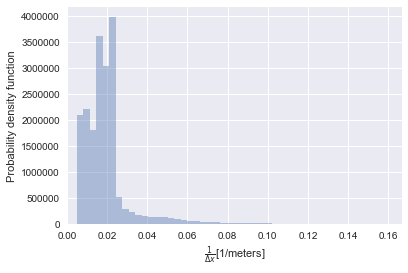

In [34]:
hard_braking_distance = all_hard_braking['distance'][np.where(all_hard_braking['distance']<200)]
inverse_distance = 1/hard_braking_distance
inverse_distance = inverse_distance[np.where(inverse_distance<1/car_length)]
sns.set()
plt.figure(2)
sns.distplot(inverse_distance, kde=False)
plt.xlim(0,1/car_length)
plt.xlabel(r"$\frac{1}{\Delta x}$[1/meters]")
plt.ylabel("Probability density function")

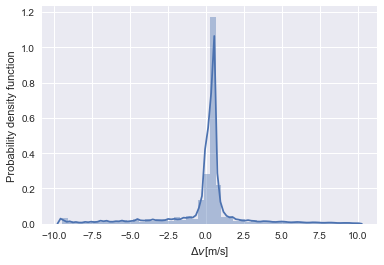

In [19]:
'''Speed difference when hard braking'''
hard_braking_dv = all_hard_braking['dv']
sns.set()
plt.figure(3)
sns.distplot(hard_braking_dv)
plt.xlabel(r"$\Delta v$[m/s]")
plt.ylabel("Probability density function")

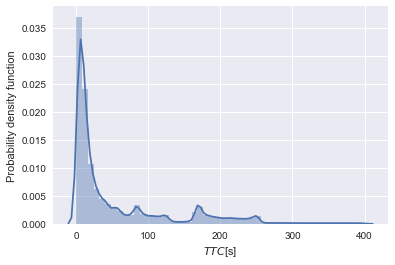

In [71]:
'''Time to Collision (TTC)'''
close_hard_braking = (all_hard_braking['distance']>car_length) & (all_hard_braking['distance'] < 100)
close_hard_braking = np.where(close_hard_braking == True)[0]
negative_dv = np.where(all_hard_braking['dv'] < 0)[0]
compute_ttc = np.intersect1d(close_hard_braking, negative_dv)

TTC = all_hard_braking['distance'][compute_ttc] / -all_hard_braking['dv'][compute_ttc]
sns.set()
plt.figure(4)
sns.distplot(TTC, kde=False)
plt.xlabel(r"$TTC$[s]")
plt.ylabel("Probability density function")


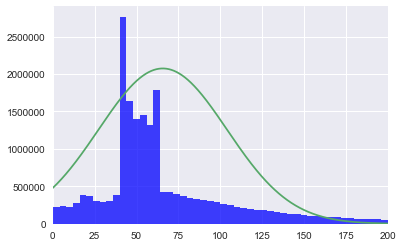

In [44]:
param_norm = norm.fit(hard_braking_distance)
size = hard_braking_distance.shape[0]
x = np.arange(size)
x = np.arange(0,200,0.1)
norm_pdf = norm.pdf(x, *param_norm[:-2], loc=param_norm[-2], scale=param_norm[-1]) * size*10

plt.figure(1)
n, bins, patches = plt.hist(hard_braking_distance, 50, facecolor='b', alpha=0.75)
plt.plot(x,norm_pdf, label='norm-distribution')
plt.xlim(0,200)
plt.show()

In [52]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=2, 
                      covariance_type='full', 
                      tol=0.001,  
                      max_iter=1000, 
                      init_params='kmeans',  
                      verbose=1)
GMM.fit(np.reshape(hard_braking_distance,(hard_braking_distance.shape[0],1)))

Initialization 0
  Iteration 0
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
param_f = f.fit(inverse_distance)

In [40]:
param_f

(1.7964938999558508,
 1.9683439733073902,
 0.0050000006454401945,
 0.011367659776600713)

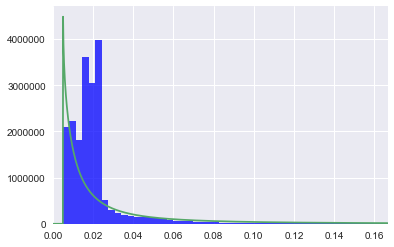

In [45]:
size = inverse_distance.shape[0]
x = np.arange(size)
x = np.arange(0,1/car_length,0.0001)
f_pdf = f.pdf(x, *param_f[:-2], loc=param_f[-2], scale=param_f[-1])*size/500

plt.figure(2)
n, bins, patches = plt.hist(inverse_distance, 50, facecolor='b', alpha=0.75)
plt.plot(x,f_pdf, label='f-distribution')
plt.xlim(0,1/car_length)
plt.show()

In [50]:
dddd = 20
1- f.cdf(1/dddd, *param_f[:-2], loc=param_f[-2], scale=param_f[-1])

0.20208760433122142

In [193]:
TTC_hardbraking = TTC

In [195]:
'''Fit time to collision'''
param_pareto_hardbraking_TTC = pareto.fit(TTC_hardbraking)
param_expon_hardbraking_TTC = expon.fit(TTC_hardbraking)

(0.63158975827039421, 57.014096079752321)

In [196]:
param_f_hardbraking_TTC = f.fit(TTC_hardbraking)
param_f_hardbraking_TTC

/home/brianyao/home/brianyao/Envs/tf/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(2.4332002401965562,
 2.2348200094868131,
 0.63158884500681189,
 18.954302012529237)

In [201]:
param_beta_hardbraking_TTC = beta.fit(TTC_hardbraking)
param_gamma_hardbraking_TTC = gamma.fit(TTC_hardbraking)

/home/brianyao/home/brianyao/Envs/tf/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [202]:
param_gamma_hardbraking_TTC

(0.63183127858020716, 0.63158975894468994, 84.256138707011019)

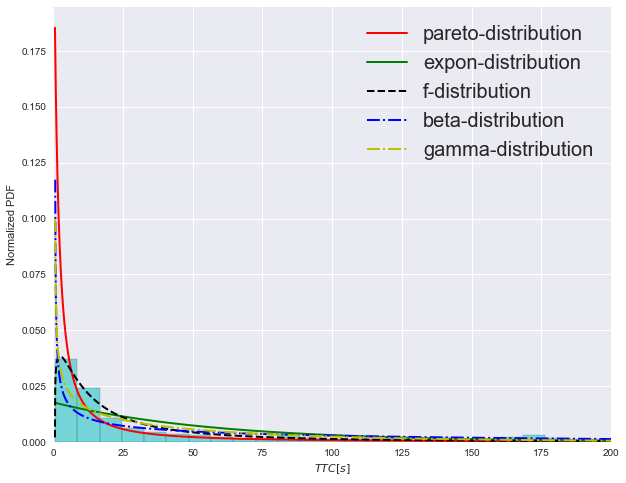

In [206]:
plt.figure(2,figsize=(10,8))
size = TTC_hardbraking.shape[0]
xmin = np.min(TTC_hardbraking)
xmax = np.max(TTC_hardbraking)
x = np.arange(xmin,xmax,0.1)
# sns.distplot(inverse_distance+1,kde=False)
n, bins, patches = plt.hist(TTC_hardbraking, 50, normed=True, stacked=True, facecolor='c', edgecolor='black', alpha=0.5)

pareto_pdf_hardbraking_TTC = pareto.pdf(x, *param_pareto_hardbraking_TTC[:-2], loc=param_pareto_hardbraking_TTC[-2], scale=param_pareto_hardbraking_TTC[-1])
plt.plot(x,pareto_pdf_hardbraking_TTC, 'r', linewidth=2.0, label='pareto-distribution')

expon_pdf_hardbraking_TTC = expon.pdf(x, *param_expon_hardbraking_TTC[:-2], loc=param_expon_hardbraking_TTC[-2], scale=param_expon_hardbraking_TTC[-1])
plt.plot(x,expon_pdf_hardbraking_TTC, 'g', linewidth=2.0, label='expon-distribution')

f_pdf_hardbraking_TTC = f.pdf(x, *param_f_hardbraking_TTC[:-2], loc=param_f_hardbraking_TTC[-2], scale=param_f_hardbraking_TTC[-1])
plt.plot(x,f_pdf_hardbraking_TTC, 'k--', linewidth=2.0, label='f-distribution')

beta_pdf_hardbraking_TTC = beta.pdf(x, *param_beta_hardbraking_TTC[:-2], loc=param_beta_hardbraking_TTC[-2], scale=param_beta_hardbraking_TTC[-1])
plt.plot(x[1:],beta_pdf_hardbraking_TTC[1:], 'b-.', linewidth=2.0, label='beta-distribution')

gamma_pdf_hardbraking_TTC = gamma.pdf(x, *param_gamma_hardbraking_TTC[:-2], loc=param_gamma_hardbraking_TTC[-2], scale=param_gamma_hardbraking_TTC[-1])
plt.plot(x[1:],gamma_pdf_hardbraking_TTC[1:], 'y-.', linewidth=2.0, label='gamma-distribution')

plt.xlim(0,200)
# plt.ylim(0,0.4)
plt.xlabel(r"$TTC[s]$")
plt.ylabel("Normalized PDF")
plt.legend(fontsize=20)
plt.show()
plt.savefig("hard_braking_TTC.png",dpi=400)

## Conflict

* Pareto : (0.89894583732865319, -1.02400443335414, 1.6241499005598183)
* exponential : (0.60014546653606793, 6.3649389906721305)
* $B$ distribution : (0.63679155113812436,64.910504439427612,0.60014546722882456,660.91636299190134)
* student-t
* f distribution : (1087.1160568218406,2.1768095419672049,0.42417414085905281,1.6609555605305601)
* $\Gamma$ distribution: (0.64644167302949296, 0.60014546722882456, 9.8596225127801596)

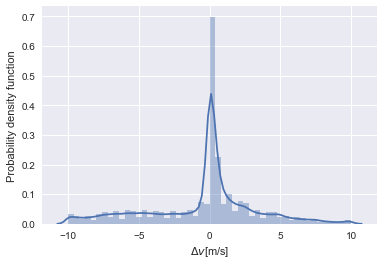

In [7]:
'''Speed difference when conflict'''
conflict_dv = all_conflict['dv'][np.where(all_conflict['dv']<200)]
sns.set()
plt.figure(1)
sns.distplot(conflict_dv)
plt.xlabel(r"$\Delta v$[m/s]")
plt.ylabel("Probability density function")

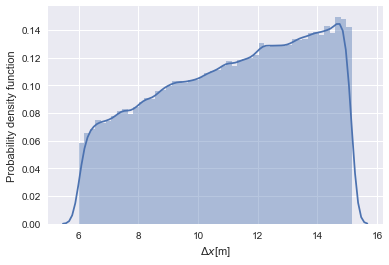

In [11]:
'''Distance difference when conflict'''
conflict_distance = all_conflict['distance'][np.where(all_conflict['distance']>car_length)]
sns.set()
plt.figure(2)
sns.distplot(conflict_distance)
plt.xlabel(r"$\Delta x$[m]")
plt.ylabel("Probability density function")

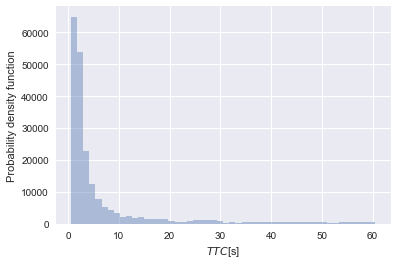

In [84]:
'''Time to collision (TTC) when conflict'''
close_conflict = np.where(all_conflict['distance']>car_length)[0]
# close_conflict = np.where(close_conflict == True)[0]
negative_dv_conflict = np.where(all_conflict['dv'] < 0)[0]
compute_ttc = np.intersect1d(close_conflict, negative_dv_conflict)

TTC_conflict = all_conflict['distance'][compute_ttc] / -all_conflict['dv'][compute_ttc]
sns.set()
plt.figure(3)
sns.distplot(TTC_conflict, kde=False)
plt.xlabel(r"$TTC$[s]")
plt.ylabel("Probability density function")

In [ ]:
'''Fit TTC for conflict'''
param_pareto_conflict_TTC = pareto.fit(TTC_conflict)
param_expon_conflict_TTC = expon.fit(TTC_conflict)
param_f_conflict_TTC = f.fit(TTC_conflict)

In [204]:
param_beta_conflict_TTC = beta.fit(TTC_conflict)
param_gamma_conflict_TTC = gamma.fit(TTC_conflict)
param_gamma_conflict_TTC

/home/brianyao/home/brianyao/Envs/tf/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/brianyao/home/brianyao/Envs/tf/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.64644167302949296, 0.60014546722882456, 9.8596225127801596)

In [192]:
param_gamma_conflict_TTC

(0.64644167302949296, 0.60014546722882456, 9.8596225127801596)

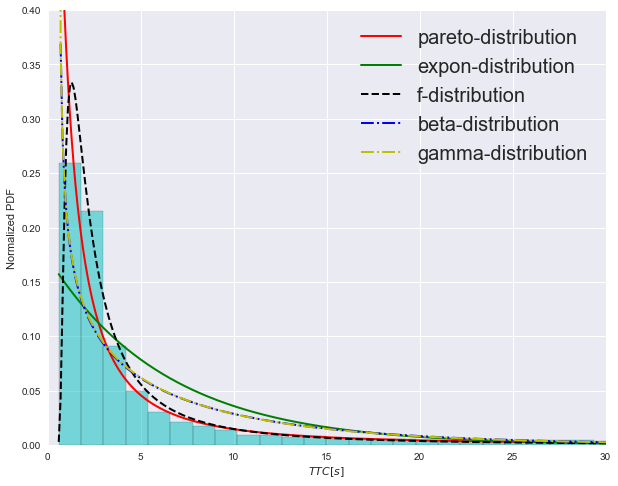

In [188]:
plt.figure(2,figsize=(10,8))
size = TTC_conflict.shape[0]
xmin = np.min(TTC_conflict)
xmax = np.max(TTC_conflict)
x = np.arange(xmin,xmax,0.1)
# sns.distplot(inverse_distance+1,kde=False)
n, bins, patches = plt.hist(TTC_conflict, 50, normed=True, stacked=True, facecolor='c', edgecolor='black', alpha=0.5)
pareto_pdf_conflict_TTC = pareto.pdf(x, *param_pareto_conflict_TTC[:-2], loc=param_pareto_conflict_TTC[-2], scale=param_pareto_conflict_TTC[-1])
plt.plot(x,pareto_pdf_conflict_TTC, 'r', linewidth=2.0, label='pareto-distribution')
expon_pdf_conflict_TTC = expon.pdf(x, *param_expon_conflict_TTC[:-2], loc=param_expon_conflict_TTC[-2], scale=param_expon_conflict_TTC[-1])
plt.plot(x,expon_pdf_conflict_TTC, 'g', linewidth=2.0, label='expon-distribution')
f_pdf_conflict_TTC = f.pdf(x, *param_f_conflict_TTC[:-2], loc=param_f_conflict_TTC[-2], scale=param_f_conflict_TTC[-1])
plt.plot(x,f_pdf_conflict_TTC, 'k--', linewidth=2.0, label='f-distribution')
beta_pdf_conflict_TTC = beta.pdf(x, *param_beta_conflict_TTC[:-2], loc=param_beta_conflict_TTC[-2], scale=param_beta_conflict_TTC[-1])
plt.plot(x[1:],beta_pdf_conflict_TTC[1:], 'b-.', linewidth=2.0, label='beta-distribution')
gamma_pdf_conflict_TTC = gamma.pdf(x, *param_gamma_conflict_TTC[:-2], loc=param_gamma_conflict_TTC[-2], scale=param_gamma_conflict_TTC[-1])
plt.plot(x,gamma_pdf_conflict_TTC, 'y-.', linewidth=2.0, label='gamma-distribution')
plt.xlim(0,30)
plt.ylim(0,0.4)
plt.xlabel(r"$TTC[s]$")
plt.ylabel("Normalized PDF")
plt.legend(fontsize=20)
plt.show()
plt.savefig("conflict_TTC.png",dpi=400)

In [110]:
pareto.cdf(0.60015, *param_pareto_TTC_conflict[:-2], loc=param_pareto_TTC_conflict[-2], scale=param_pareto_TTC_conflict[-1])


2.5088360305902668e-06

In [118]:
-np.log2(2.5088360305902668e-06)

18.604550385378381

### Cut-in

We look at the distribution of cut-in range 
* Pareto : (3.8862805464123973, -0.047395330644464898, 0.05239533128989797)
* exponential : (0.0050000006453215558, 0.01605561300449445)
* $B$ distribution : (1.4199180196428296,601616317.20772862,0.0049612830576293582,6792918.1399051379)
* student-t
* f distribution : (1.7964938999558508,1.9683439733073902,0.0050000006454401945,0.011367659776600713)
* $\Gamma$ distribution : (1.4041223306406492, 0.0049677540528822155, 0.011457610909442814)


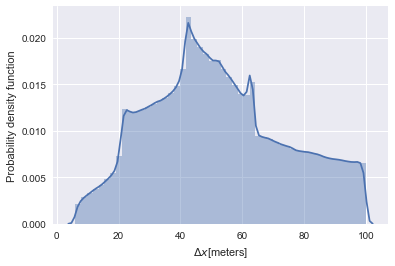

In [121]:
'''Cut-in distance'''
close_cutin = (all_cut_in['distance'] > car_length) #& (all_cut_in['distance']<=100)
cut_in_distance = all_cut_in['distance'][close_cutin]
sns.set()
plt.figure(1)
sns.distplot(cut_in_distance)
plt.xlabel(r"$\Delta x$[meters]")
plt.ylabel("Probability density function")

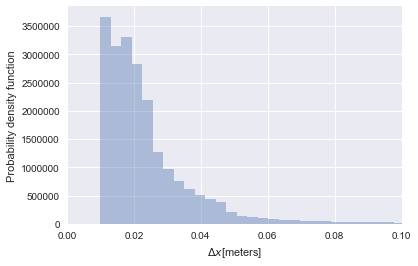

In [122]:
'''Inverse of cut-in distance'''
plt.figure(2)
# idx = np.where(1/all_cut_in['distance'] < 0.1)[0]
inverse_distance_cut_in = 1/all_cut_in['distance'][close_cutin]
sns.distplot(inverse_distance_cut_in, kde=False)
plt.xlim([0,0.1])
plt.xlabel(r"$\Delta x$[meters]")
plt.ylabel("Probability density function")

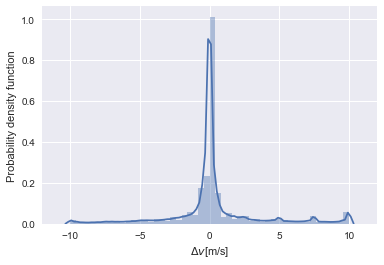

In [28]:
'''speed difference when cut in'''
plt.figure(3)
cut_in_dv = all_cut_in['v_cutin'][close_cutin] - all_cut_in['v_host'][close_cutin]
sns.distplot(cut_in_dv)
plt.xlim([-12,12])
plt.xlabel(r"$\Delta v$[m/s]")
plt.ylabel("Probability density function")

In [207]:
param_pareto_cutin_dx = pareto.fit(inverse_distance)
param_expon_cutin_dx = expon.fit(inverse_distance)
param_f_cutin_dx = f.fit(inverse_distance)
param_beta_cutin_dx = beta.fit(inverse_distance)
param_gamma_cutin_dx = gamma.fit(inverse_distance)

In [ ]:
print("pareto:",param_pareto_cutin_dx)
print("exponential:", param_expon_cutin_dx)
print("f:", param_f_cutin_dx)

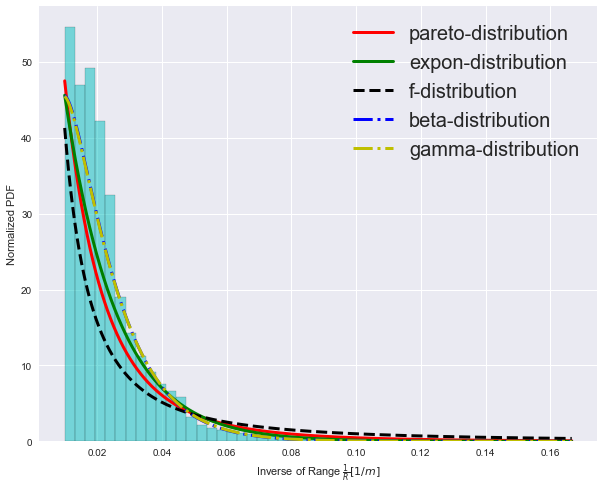

In [209]:
plt.figure(2,figsize=(10,8))
size = inverse_distance_cut_in.shape[0]
xmin = np.min(inverse_distance_cut_in)
xmax = np.max(inverse_distance_cut_in)
x = np.arange(xmin,xmax,0.0001)
# sns.distplot(inverse_distance+1,kde=False)
n, bins, patches = plt.hist(inverse_distance_cut_in, 50, normed=True, stacked=True, facecolor='c', edgecolor='black', alpha=0.5)
pareto_pdf_cutin_dx = pareto.pdf(x, *param_pareto_cutin_dx[:-2], loc=param_pareto_cutin_dx[-2], scale=param_pareto_cutin_dx[-1])
plt.plot(x,pareto_pdf_cutin_dx, 'r', linewidth=3.0, label='pareto-distribution')
expon_pdf_cutin_dx = expon.pdf(x, *param_expon_cutin_dx[:-2], loc=param_expon_cutin_dx[-2], scale=param_expon_cutin_dx[-1])
plt.plot(x,expon_pdf_cutin_dx, 'g', linewidth=3.0, label='expon-distribution')
f_pdf_cutin_dx = f.pdf(x, *param_f_cutin_dx[:-2], loc=param_f_cutin_dx[-2], scale=param_f_cutin_dx[-1])
plt.plot(x,f_pdf_cutin_dx, 'k--', linewidth=3.0, label='f-distribution')
beta_pdf_cutin_dx = beta.pdf(x, *param_beta_cutin_dx[:-2], loc=param_beta_cutin_dx[-2], scale=param_beta_cutin_dx[-1])
plt.plot(x,beta_pdf_cutin_dx, 'b-.', linewidth=3.0, label='beta-distribution')
gamma_pdf_cutin_dx = gamma.pdf(x, *param_gamma_cutin_dx[:-2], loc=param_gamma_cutin_dx[-2], scale=param_gamma_cutin_dx[-1])
plt.plot(x,gamma_pdf_cutin_dx, 'y-.', linewidth=3.0, label='gamma-distribution')
# plt.xlim(xmin,xmin+0.1)
plt.xlabel(r"Inverse of Range $\frac{1}{R}[1/m]$")
plt.ylabel("Normalized PDF")
plt.legend(fontsize=20)
plt.show()
plt.savefig("cutin_range.png",dpi=400)

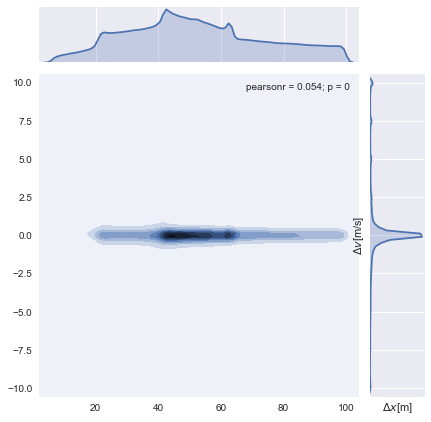

In [31]:
g = sns.jointplot(x=cut_in_distance, y=cut_in_dv, kind="kde")

plt.xlabel(r"$\Delta x$[m]")
plt.ylabel(r"$\Delta v$[m/s]")
plt.savefig('cutin_dx_dv.png',dpi=200)
plt.show()

# Test the fitted distribution
* pareto
* exponential
* others

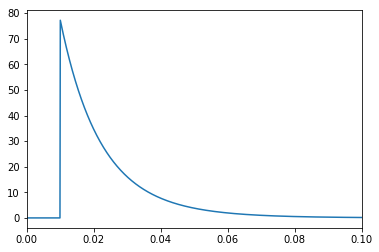

In [6]:
import matplotlib.pyplot as plt
plt.figure(1)
xmin = 0
x = np.arange(xmin,xmin+0.1,0.0001)
# sns.distplot(inverse_distance+1,kde=False)
pareto_pdf = pareto.pdf(x, *param_pareto[:-2], loc=param_pareto[-2], scale=param_pareto[-1])
plt.plot(x,pareto_pdf, label='pareto-distribution')
plt.xlim(xmin,xmin+0.1)
plt.show()

In [13]:
from scipy.stats import pareto
dx = 6
x = 1/dx
param_pareto = [16.109790042691415, -0.19787817891575638, 0.20782996049374303]
prob = 1- pareto.cdf(x, param_pareto[:-2], loc=param_pareto[-2], scale=param_pareto[-1])
-np.log2(prob)

array([ 13.06008849])